Running in simulation mode (RPi.GPIO not found).


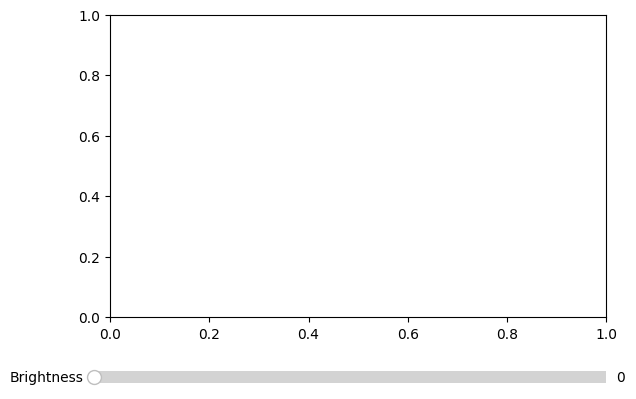

In [1]:
#LED BRIGHTNESS CONTROL USING PYTHON
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

try:
    import RPi.GPIO as GPIO
    gpio_available = True
except ModuleNotFoundError:
    print("Running in simulation mode (RPi.GPIO not found).")
    gpio_available = False

# GPIO Setup (Only if running on Raspberry Pi)
LED_PIN = 18

if gpio_available:
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(LED_PIN, GPIO.OUT)
    pwm = GPIO.PWM(LED_PIN, 1000)  # Frequency: 1000 Hz
    pwm.start(0)

# Function to update LED brightness
def update_brightness(val):
    brightness = int(val)
    if gpio_available:
        pwm.ChangeDutyCycle(brightness)  # Change LED brightness
    print(f"Brightness: {brightness}%")  # Print brightness in simulation mode

# Create a simple Matplotlib window
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

# Add a slider for brightness control
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.05])
slider = Slider(ax_slider, "Brightness", 0, 100, valinit=0, valstep=1)

# Update LED brightness when the slider moves
slider.on_changed(update_brightness)

# Show the GUI
plt.show()

# Cleanup GPIO when closing the GUI
if gpio_available:
    pwm.stop()
    GPIO.cleanup()
